Kmeans from Scratch

In [1]:
datapoints=[(1,2),(2,6),(12,10),(3,10),(3,8),(14,9),(4,6),(15,10),(6,9),(6,11),(7,5),(15,4),(7,2),(15,18),(4,7)]

In [2]:
from math import sqrt
def dist(a,b):
    return round( sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2) , 2 )

In [3]:
def avg(li = [(1,2),(1,2)]):
    x,y=0,0
    for i in li:
        x+=i[0]
        y+=i[1]
    x= round(x/len(li),2)
    y= round(y/len(li),2)
    # y=y/len(li)
    return (x,y)
avg([(1,2),(1,2)])

(1.0, 2.0)

In [4]:
def assign_cluster(points,initial_clusters):
    centrids = initial_clusters
    count=0
    while True :
        clusters=[[] for _ in initial_clusters]
        for point in points:
            d=[]
            for c in centrids:
                d.append(dist(point,c))
            idx = d.index(min(d))
            clusters[idx].append(point)

        new_centroid =[]
        for c in clusters:
            new_centroid.append(avg(c))
        
        print(centrids,new_centroid)
        if new_centroid==centrids:
            break
        if count>1000:
            break

        centrids=new_centroid
        count+=1


    return clusters,centrids
            
        
clusters,centroids=assign_cluster(datapoints,[(1,2),(2,6),(12,10)])

[(1, 2), (2, 6), (12, 10)] [(4.0, 2.0), (4.14, 7.29), (12.83, 10.33)]
[(4.0, 2.0), (4.14, 7.29), (12.83, 10.33)] [(4.0, 2.0), (4.38, 7.75), (14.2, 10.2)]
[(4.0, 2.0), (4.38, 7.75), (14.2, 10.2)] [(4.0, 2.0), (4.38, 7.75), (14.2, 10.2)]


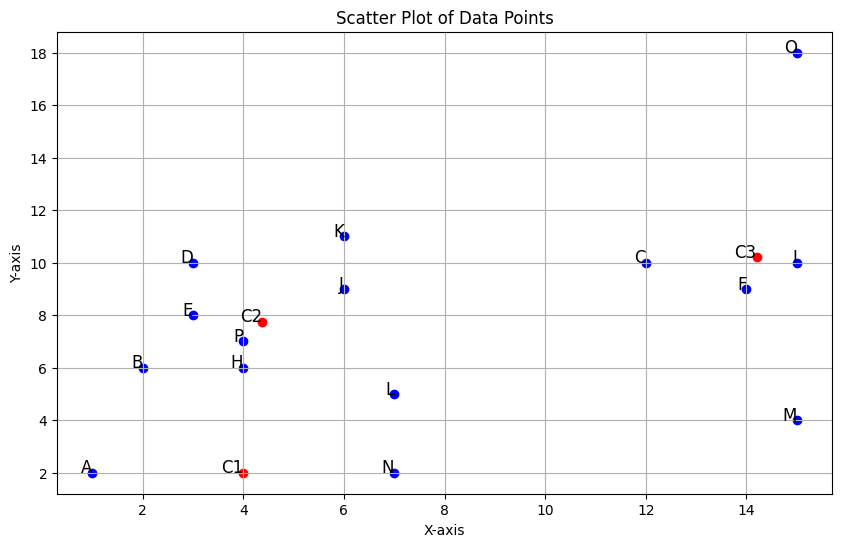

In [5]:
import matplotlib.pyplot as plt

x = [point[0] for point in datapoints]
y = [point[1] for point in datapoints]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

x_ = [point[0] for point in centroids]
y_ = [point[1] for point in centroids]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue')

plt.scatter(x_, y_, color='red')

for (x_val, y_val),label in zip(datapoints,labels):
    plt.text(x_val, y_val, label,fontsize=12, ha='right')
for (x_val, y_val),label in zip(centroids,['C1','C2','C3']):
    plt.text(x_val, y_val, label,fontsize=12, ha='right')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Data Points')

plt.grid(True)
plt.show()

In [6]:
def dist_to_cent(centroid,cluster):
    tot_dist=0
    for c in cluster:
        tot_dist+=dist(centroid,c)
    
    return round(tot_dist/len(cluster),2)


In [7]:
def within_clust_dist(clusters,centroids):
    distance=0
    for centroid,cluster  in zip(centroids,clusters):
        distance+=dist_to_cent(centroid,cluster)

    return distance

within_clust_dist(clusters,centroids)


9.06

Kmeans using sklearn

In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


iris = load_iris()
X = iris.data
y = iris.target


In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

predicted_clusters = kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [28]:
wcss = kmeans.inertia_
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")


Within-Cluster Sum of Squares (WCSS): 78.85566582597731


In [15]:
label_encoder = LabelEncoder()
mapped_clusters = label_encoder.fit_transform(kmeans.labels_)

accuracy = accuracy_score(y, mapped_clusters)
print(f"Accuracy: {accuracy}")


Accuracy: 0.09333333333333334


Kmedoids from scratch

In [25]:
def kmedoids(data,medoids):
    clusters = [[] for _ in medoids ]

    for point in data:
        d=[]
        for med in medoids:
            d.append(dist(point,med))
        idx=d.index(min(d))
        clusters[idx].append(point)
    return clusters

c1=kmedoids(datapoints,[(12,10),(7,2),(4,7)])
c2 =kmedoids(datapoints,[(12,10),(7,2),(4,6)])

c1,c2

([[(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)],
  [(7, 5), (7, 2)],
  [(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (4, 7)]],
 [[(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)],
  [(7, 5), (7, 2)],
  [(1, 2), (2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (4, 7)]])

In [23]:
def calc_cost(clusters,medoids):
    cost=0
    for med,cluster in zip(medoids,clusters):
        for c in cluster:
            cost+= dist(med,c)
    return cost
cost1=calc_cost(c1,[(12,10),(7,2),(4,7)])
cost2=calc_cost(c2,[(12,10),(7,2),(4,6)])

cost1,cost2

(44.42999999999999, 46.85)

In [24]:
if cost1<cost2:
    print("cnp best")
else:
    print("cng best")

cnp best
